## Libraries

In [1]:
!pip install opencv-python

You should consider upgrading via the 'C:\Users\rawan\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import flask
from flask import Flask
from flask import request
import cv2 
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense

In [3]:
print(flask.__version__)

1.1.2


#### Global constants

In [4]:
IMG_DIMEN = 224
N_COLOURS = 3

## Read Image

In [5]:
def read_image (img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, dsize=(IMG_DIMEN,IMG_DIMEN))
    #img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
    img = img.astype('float32')/255.0
    return img

#### Show image

In [6]:
def imshow(img):
    plt.figure(figsize=(6,6))
    if N_COLOURS ==3:
        plt.imshow(img)
    else:
        plt.show()

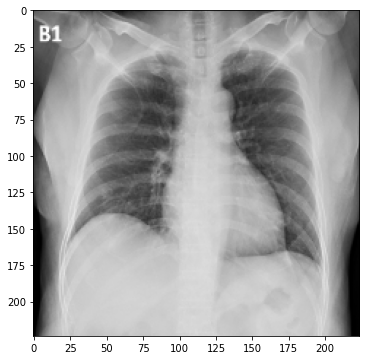

In [10]:
## Test
img = read_image('D:/Covid19-dataset/test/Covid/094.png')
imshow(img)

## CNN architecture

In [11]:
model = Sequential()
model.add(Conv2D(16 , 7 , activation='relu',input_shape=(IMG_DIMEN,IMG_DIMEN,N_COLOURS)))
model.add(Conv2D(16 , 7 , activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(32 ,5 , activation='relu'))
model.add(Conv2D(32 ,5 , activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(64 ,3 , activation='relu'))
model.add(Conv2D(64 ,3 , activation='relu'))
model.add(MaxPooling2D(2))
model.add(GlobalAveragePooling2D())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])

In [12]:
model.load_weights('best_model')

## Classify Image

In [13]:
def classify_image(img_path):
    img = read_image(img_path)
    return float(model.predict(np.array([img])).squeeze())

In [15]:
## Test
classify_image('D:/Covid19-dataset/test/Covid/094.png')

1/1 [==============================] - 0s 321ms/step


0.5141507387161255

## Flask API

In [ ]:
app = Flask(__name__)

@app.route('/classify' , methods = ['POST'])
def classify_handler():
    img_path = request.form['path']
    y_pred = classify_image(img_path)
    class_name = 'Covid' if y_pred >= 0.5 else 'Normal'
    prob_Covid = y_pred
    prob_Normal = 1 - y_pred
    print('Image Path: ' ,img_path )
    print('Prediction: ' ,y_pred )
    print('Class Name: ' ,class_name )
    #JSON
    return {
        'Normal Probability : ':prob_Normal,
        'Covid Probability : ':prob_Covid,
        'Class Name: ' : class_name 
    
    }
app.run(port=9000)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:9000/ (Press CTRL+C to quit)
127.0.0.1 - - [12/Sep/2022 10:53:36] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [12/Sep/2022 10:53:37] "GET /favicon.ico HTTP/1.1" 404 -


1/1 [==============================] - 0s 50ms/step


127.0.0.1 - - [12/Sep/2022 11:02:16] "POST /classify HTTP/1.1" 200 -


Image Path:  D:/Covid19-dataset/test/Covid/094.png
Prediction:  0.5141507387161255
Class Name:  Covid
1/1 [==============================] - 0s 30ms/step


127.0.0.1 - - [12/Sep/2022 11:05:06] "POST /classify HTTP/1.1" 200 -


Image Path:  D:/Covid19-dataset/test/Normal/07.jpeg
Prediction:  0.5113936066627502
Class Name:  Covid
1/1 [==============================] - 0s 149ms/step


127.0.0.1 - - [12/Sep/2022 15:06:07] "POST /classify HTTP/1.1" 200 -


Image Path:  D:/Covid19-dataset/test/Normal/0108.jpeg
Prediction:  0.5116729736328125
Class Name:  Covid
1/1 [==============================] - 0s 70ms/step


127.0.0.1 - - [12/Sep/2022 15:08:06] "POST /classify HTTP/1.1" 200 -


Image Path:  D:/Covid19-dataset/test/Normal/011.jpeg
Prediction:  0.5132261514663696
Class Name:  Covid
1/1 [==============================] - 0s 42ms/step


127.0.0.1 - - [12/Sep/2022 15:08:42] "POST /classify HTTP/1.1" 200 -


Image Path:  D:/Covid19-dataset/test/Normal/075.jpeg
Prediction:  0.5119941830635071
Class Name:  Covid
1/1 [==============================] - 0s 52ms/step


127.0.0.1 - - [12/Sep/2022 15:08:45] "POST /classify HTTP/1.1" 200 -


Image Path:  D:/Covid19-dataset/test/Normal/075.jpeg
Prediction:  0.5119941830635071
Class Name:  Covid


127.0.0.1 - - [12/Sep/2022 16:07:05] "POST / HTTP/1.1" 404 -
127.0.0.1 - - [12/Sep/2022 16:15:29] "POST / HTTP/1.1" 404 -
127.0.0.1 - - [12/Sep/2022 16:18:04] "POST /classify HTTP/1.1" 400 -
127.0.0.1 - - [12/Sep/2022 16:23:50] "POST /classify HTTP/1.1" 400 -
127.0.0.1 - - [12/Sep/2022 16:25:01] "POST /classify HTTP/1.1" 400 -
127.0.0.1 - - [12/Sep/2022 16:25:09] "POST /classify HTTP/1.1" 400 -
127.0.0.1 - - [12/Sep/2022 16:26:32] "POST /classify HTTP/1.1" 400 -


1/1 [==============================] - 0s 351ms/step


127.0.0.1 - - [12/Sep/2022 16:30:03] "POST /classify HTTP/1.1" 200 -


Image Path:  D:/my-website/public/radiology_images/1662993002.jpg
Prediction:  0.5106430053710938
Class Name:  Covid
1/1 [==============================] - 0s 95ms/step


127.0.0.1 - - [12/Sep/2022 16:31:01] "POST /classify HTTP/1.1" 200 -


Image Path:  D:/my-website/public/radiology_images/1662993061.jpg
Prediction:  0.5106430053710938
Class Name:  Covid
1/1 [==============================] - 0s 64ms/step


127.0.0.1 - - [12/Sep/2022 16:32:09] "POST /classify HTTP/1.1" 200 -


Image Path:  D:/my-website/public/radiology_images/1662993129.jpg
Prediction:  0.5106430053710938
Class Name:  Covid
1/1 [==============================] - 0s 85ms/step


127.0.0.1 - - [12/Sep/2022 16:33:28] "POST /classify HTTP/1.1" 200 -


Image Path:  D:/my-website/public/radiology_images/1662993207.jpg
Prediction:  0.5126675367355347
Class Name:  Covid
1/1 [==============================] - 0s 89ms/step


127.0.0.1 - - [12/Sep/2022 16:34:07] "POST /classify HTTP/1.1" 200 -


Image Path:  D:/my-website/public/radiology_images/1662993246.jpg
Prediction:  0.5121716260910034
Class Name:  Covid
1/1 [==============================] - 0s 92ms/step


127.0.0.1 - - [12/Sep/2022 17:00:24] "POST /classify HTTP/1.1" 200 -


Image Path:  D:/my-website/public/radiology_images/1662994824.jpg
Prediction:  0.5101400017738342
Class Name:  Covid
1/1 [==============================] - 0s 72ms/step


127.0.0.1 - - [12/Sep/2022 17:02:25] "POST /classify HTTP/1.1" 200 -


Image Path:  D:/my-website/public/radiology_images/1662994945.jpg
Prediction:  0.5101400017738342
Class Name:  Covid
1/1 [==============================] - 0s 64ms/step


127.0.0.1 - - [12/Sep/2022 17:03:59] "POST /classify HTTP/1.1" 200 -


Image Path:  D:/my-website/public/radiology_images/1662995038.jpg
Prediction:  0.5101400017738342
Class Name:  Covid
1/1 [==============================] - 0s 87ms/step


127.0.0.1 - - [12/Sep/2022 17:05:38] "POST /classify HTTP/1.1" 200 -


Image Path:  D:/my-website/public/radiology_images/1662995138.jpg
Prediction:  0.5101400017738342
Class Name:  Covid
1/1 [==============================] - 0s 76ms/step


127.0.0.1 - - [12/Sep/2022 17:05:48] "POST /classify HTTP/1.1" 200 -


Image Path:  D:/my-website/public/radiology_images/1662995147.jpg
Prediction:  0.5122359395027161
Class Name:  Covid
1/1 [==============================] - 1s 513ms/step


127.0.0.1 - - [12/Sep/2022 17:09:18] "POST /classify HTTP/1.1" 200 -


Image Path:  D:/my-website/public/radiology_images/1662995356.jpg
Prediction:  0.5122359395027161
Class Name:  Covid
1/1 [==============================] - 0s 61ms/step


127.0.0.1 - - [12/Sep/2022 17:10:45] "POST /classify HTTP/1.1" 200 -


Image Path:  D:/my-website/public/radiology_images/1662995445.jpg
Prediction:  0.5122359395027161
Class Name:  Covid
1/1 [==============================] - 0s 36ms/step


127.0.0.1 - - [12/Sep/2022 17:10:58] "POST /classify HTTP/1.1" 200 -


Image Path:  D:/my-website/public/radiology_images/1662995458.jpg
Prediction:  0.5101400017738342
Class Name:  Covid
1/1 [==============================] - 0s 34ms/step


127.0.0.1 - - [12/Sep/2022 17:13:18] "POST /classify HTTP/1.1" 200 -


Image Path:  D:/my-website/public/radiology_images/1662995598.jpg
Prediction:  0.5118250250816345
Class Name:  Covid
1/1 [==============================] - 0s 33ms/step


127.0.0.1 - - [12/Sep/2022 17:14:17] "POST /classify HTTP/1.1" 200 -


Image Path:  D:/my-website/public/radiology_images/1662995657.jpg
Prediction:  0.5118250250816345
Class Name:  Covid
1/1 [==============================] - 0s 33ms/step


127.0.0.1 - - [12/Sep/2022 17:14:57] "POST /classify HTTP/1.1" 200 -


Image Path:  D:/my-website/public/radiology_images/1662995697.jpg
Prediction:  0.5118250250816345
Class Name:  Covid
1/1 [==============================] - 0s 34ms/step


127.0.0.1 - - [12/Sep/2022 17:18:03] "POST /classify HTTP/1.1" 200 -


Image Path:  D:/my-website/public/radiology_images/1662995883.jpg
Prediction:  0.5118250250816345
Class Name:  Covid
1/1 [==============================] - 0s 35ms/step


127.0.0.1 - - [12/Sep/2022 17:22:03] "POST /classify HTTP/1.1" 200 -


Image Path:  D:/my-website/public/radiology_images/1662996123.jpg
Prediction:  0.5125388503074646
Class Name:  Covid
1/1 [==============================] - 0s 36ms/step


127.0.0.1 - - [12/Sep/2022 17:24:22] "POST /classify HTTP/1.1" 200 -


Image Path:  D:/my-website/public/radiology_images/1662996262.jpg
Prediction:  0.5125388503074646
Class Name:  Covid
1/1 [==============================] - 0s 40ms/step


127.0.0.1 - - [12/Sep/2022 17:30:20] "POST /classify HTTP/1.1" 200 -


Image Path:  D:/my-website/public/radiology_images/1662996620.png
Prediction:  0.510974109172821
Class Name:  Covid
1/1 [==============================] - 0s 37ms/step


127.0.0.1 - - [12/Sep/2022 17:37:43] "POST /classify HTTP/1.1" 200 -


Image Path:  D:/my-website/public/radiology_images/1662997063.jpg
Prediction:  0.513773500919342
Class Name:  Covid
